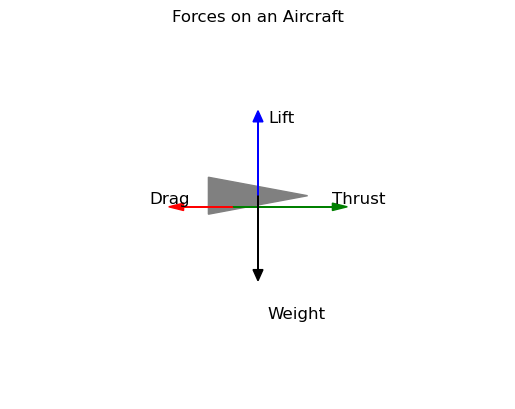

In [1]:
# Jupyter Cell 1: Basic Force Diagram

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# Draw plane as a triangle
plane = plt.Polygon([[4, 5], [6, 5.5], [4, 6]], color='gray')
ax.add_patch(plane)

# Draw arrows: Lift, Drag, Thrust, Weight
ax.arrow(5, 5.5, 0, 2, head_width=0.2, color='blue', label='Lift')
ax.text(5.2, 7.5, 'Lift', fontsize=12)

ax.arrow(5.5, 5.2, -2, 0, head_width=0.2, color='red', label='Drag')
ax.text(2.8, 5.3, 'Drag', fontsize=12)

ax.arrow(4.5, 5.2, 2, 0, head_width=0.2, color='green', label='Thrust')
ax.text(6.5, 5.3, 'Thrust', fontsize=12)

ax.arrow(5, 5.5, 0, -2, head_width=0.2, color='black', label='Weight')
ax.text(5.2, 2.2, 'Weight', fontsize=12)

ax.axis('off')
plt.title("Forces on an Aircraft")
plt.show()


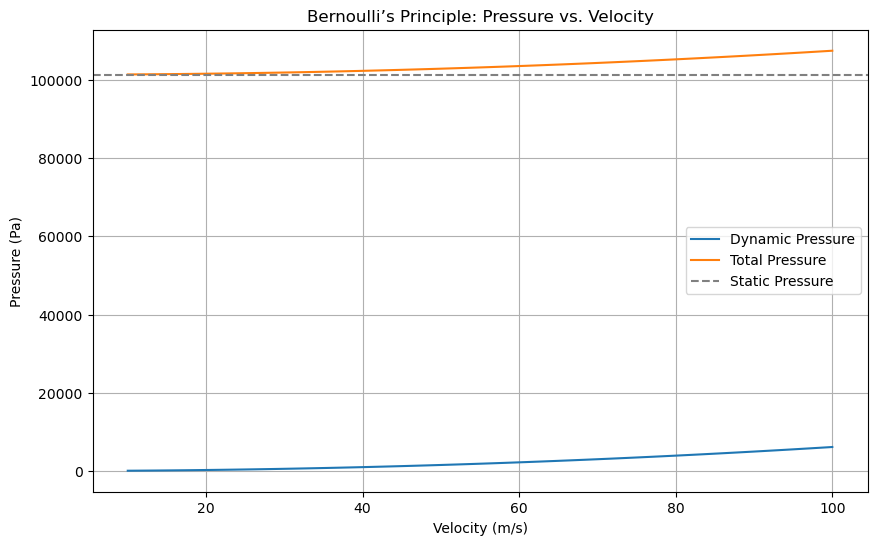

In [2]:
# Jupyter Cell 2: Pressure vs. Velocity Visualization

import numpy as np
import matplotlib.pyplot as plt

v = np.linspace(10, 100, 100)  # velocity in m/s
rho = 1.225  # air density (kg/m^3)
p_static = 101325  # sea level pressure

p_dynamic = 0.5 * rho * v**2
p_total = p_static + p_dynamic

plt.figure(figsize=(10, 6))
plt.plot(v, p_dynamic, label='Dynamic Pressure')
plt.plot(v, p_total, label='Total Pressure')
plt.axhline(y=p_static, color='gray', linestyle='--', label='Static Pressure')

plt.xlabel('Velocity (m/s)')
plt.ylabel('Pressure (Pa)')
plt.title('Bernoulli’s Principle: Pressure vs. Velocity')
plt.legend()
plt.grid(True)
plt.show()


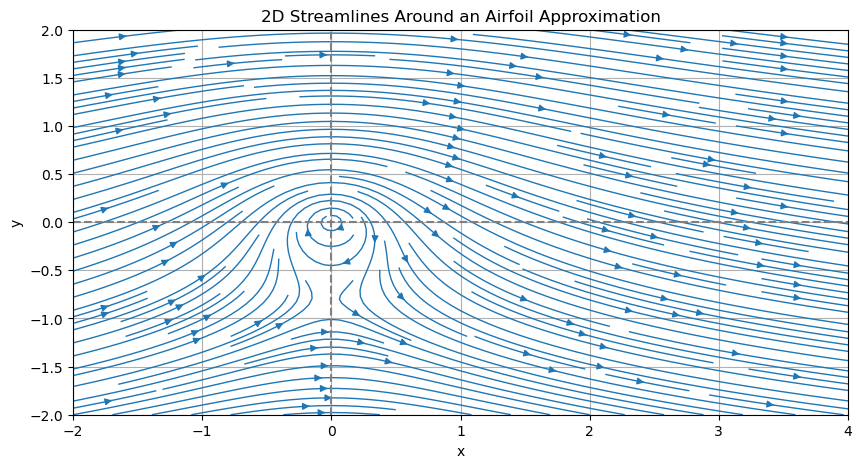

In [3]:
# Jupyter Cell 3: Streamlines around a cambered airfoil

import matplotlib.pyplot as plt
import numpy as np

# Define grid
x, y = np.meshgrid(np.linspace(-2, 4, 100), np.linspace(-2, 2, 100))
U = 1  # Uniform flow
V = 0

# Superimpose flow with a vortex and source to simulate lift
r_squared = x**2 + y**2
gamma = 5  # circulation strength

u = U + gamma*y/(2*np.pi*r_squared)
v = V - gamma*x/(2*np.pi*r_squared)

plt.figure(figsize=(10, 5))
plt.streamplot(x, y, u, v, density=2, linewidth=1)
plt.title('2D Streamlines Around an Airfoil Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()
